# LogNormal Distribution            

Very userful to model data coming from large scale-range    

Look carefully~~~~~

In [119]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.pylabtools import figsize
import pymc3 as pm
import arviz as az

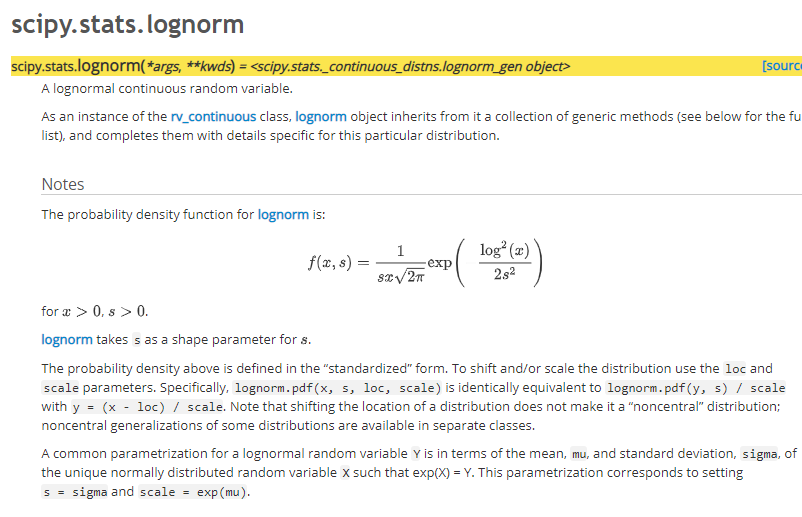

1. 用一个参数s控制lognormal的形状
2. 左右移动使用 $loc$ <font color = 'firebrick'> 平移，平移，平移，平移
3. $scale$现在说不好

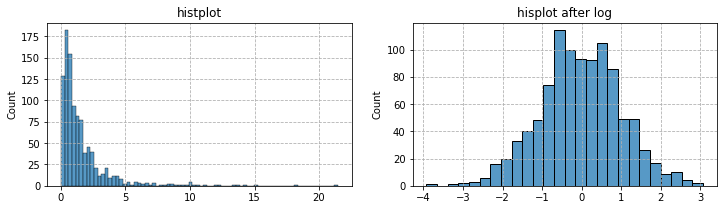

In [2]:
data = stats.lognorm(s = 1).rvs(1000)

figsize(12,3)
plt.subplot(1,2,1)
sns.histplot(data)
plt.title('histplot')
plt.grid(linestyle = '--')
plt.subplot(1,2,2)
sns.histplot(np.log(data))
plt.title('hisplot after log')
plt.grid(linestyle = '--')
plt.show()

Lognormal generate data as shown in left plot, when plot log(data), it looks like a normal

1. LOC 这个参数是直接平移这个东西的, 先不用管

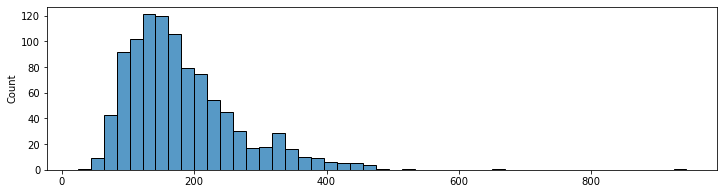

In [102]:
loc = 5.095
s = 0.455

sns.histplot(stats.lognorm(s = s, scale = np.exp(loc)).rvs(1000))

按照这种方式下来的随机数， 经过log过后， 均值 = loc

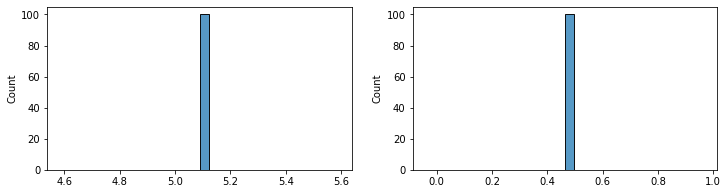

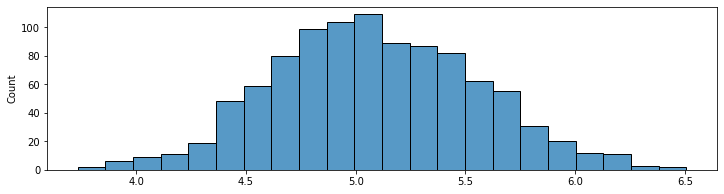

In [112]:
sample = stats.lognorm(s = s, scale = np.exp(loc)).rvs(1000)

plt.subplot(1,2,1)
sns.histplot([np.log(sample).mean() for _ in range(100)], bins = 30)
plt.subplot(1,2,2)
sns.histplot([np.log(sample).std() for _ in range(100)], bins = 30)
plt.show()

sns.histplot(np.log(sample))
plt.show()


#### 我们看到scipy中最重要的一句话
A common parametrization for a lognormal random variable Y is in terms of the mean, mu, and standard deviation, sigma, of the unique normally distributed random variable X such that exp(X) = Y.                 
**This parametrization corresponds to setting s = sigma and scale = exp(mu).**               


```python
sample = stats.lognorm(s = s, scale = np.exp(loc)).rvs(1000)
```

$s$      把一个贼偏的分布转化成log以后的标准差             
$scale$  把一个贼偏的分布转化成log以后的均值， 再exp                         


## 把log以后normal的标准差给$s$
## 把log之后normal的均值exp以后， 给scale

## Inside PYMC

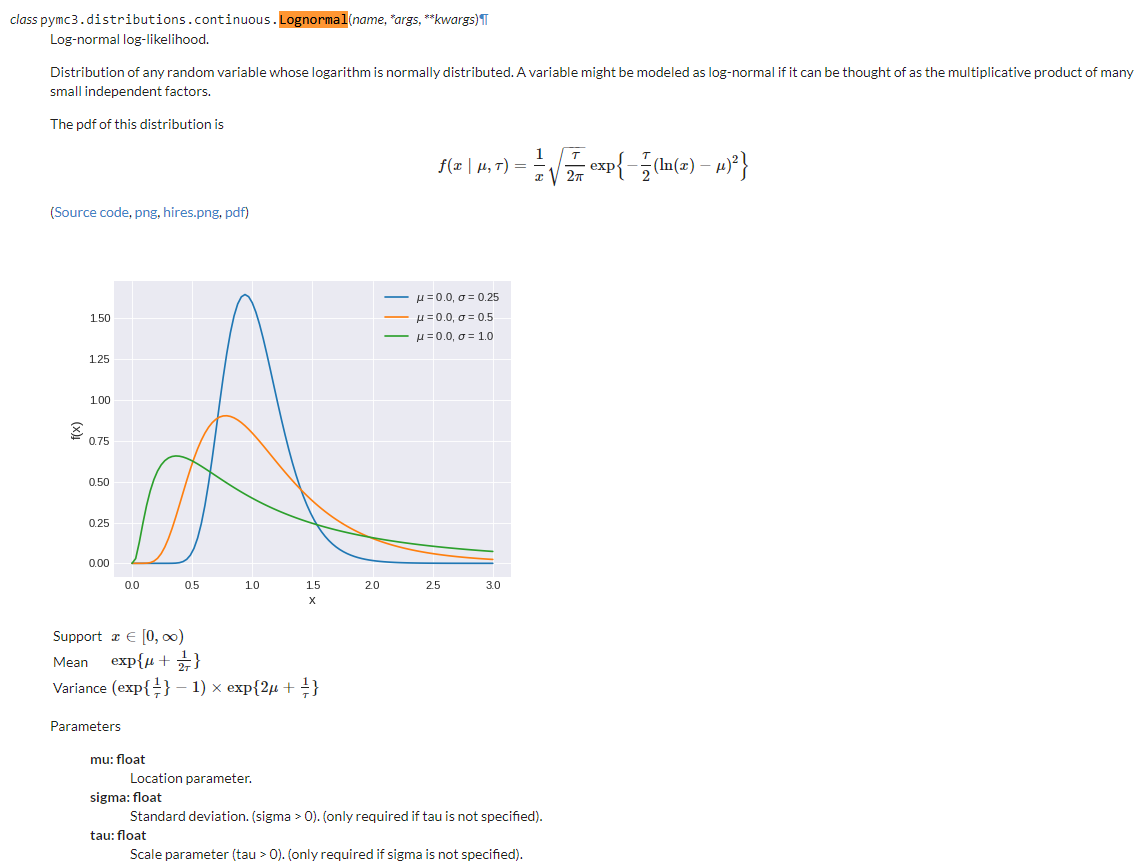

## Example Show

**假设我们现在有一个分布， 比较偏的分布**

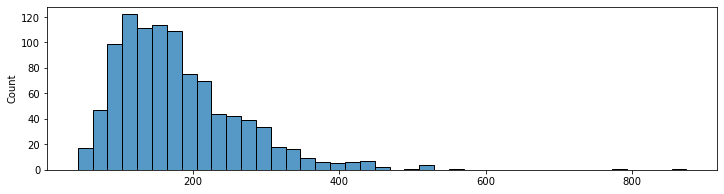

In [116]:
loc = 5.095
s = 0.455

data = stats.lognorm(s = s, scale = np.exp(loc)).rvs(1000)
sns.histplot(data)

In [120]:
with pm.Model() as model:
    mu= pm.HalfNormal('mu', sd = 10)
    sigma= pm.Uniform('sigma',  0, 10)
    
    obs = pm.Lognormal('obs', mu = mu, sigma = sigma, observed = data)
    trace = pm.sample(1000, return_inferencedata=True)

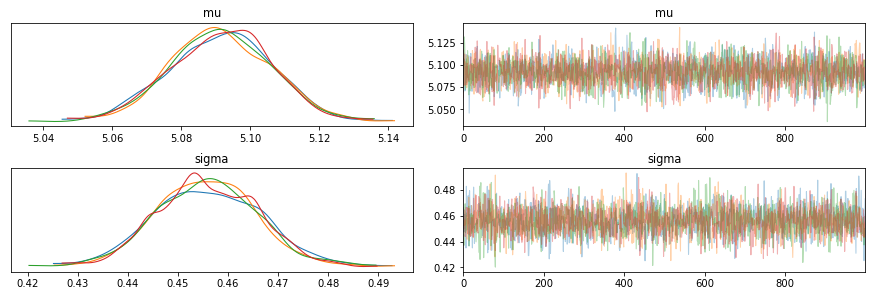

In [122]:
az.plot_trace(trace)
plt.show()

In [123]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,5.092,0.015,5.064,5.117,0.0,0.0,3163.0,3163.0,3166.0,2350.0,1.0
sigma,0.456,0.010,0.437,0.476,0.0,0.0,3401.0,3396.0,3411.0,2847.0,1.0


**<font color='firebrick'>Very accurate estimation**

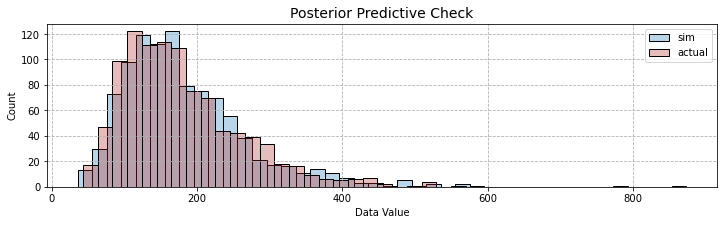

In [135]:
sim_data = stats.lognorm(s = 0.456, scale = np.exp(5.092)).rvs(1000)
sns.histplot(sim_data, alpha = 0.3, label = 'sim')
sns.histplot(data, alpha = 0.3, label = 'actual', color = 'firebrick')
plt.legend(loc = 'upper right')
plt.grid(linestyle=  '--')
plt.title('Posterior Predictive Check', fontsize = 14)
plt.xlabel('Data Value')
plt.show()